In [ ]:
## OR1, lecture 3, unconstrained optimization
## Example least-squares code
## Brien Alkire, 20220304
# Import packages
import numpy as np
import cvxpy as cp
# Generate data
m=20
n=15
np.random.seed(1)
A=np.random.randn(m,n)
b=np.random.randn(m)
# Define and solve
x=cp.Variable(n)
cost=cp.sum_squares(A@x-b)
prob=cp.Problem(cp.Minimize(cost))
prob.solve()
# Print results
print("The status is",prob.status)
print("The optimal solution is",prob.value)
print("The optimal x is",x.value)
print("The norm of the residual is",cp.norm(A@x-b,p=2).value)

The status is optimal
The optimal solution is 7.005909828287484
The optimal x is [ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
The norm of the residual is 2.6468679280023557


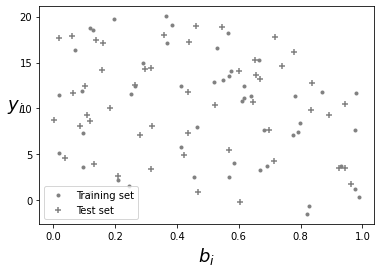

In [ ]:
## EXAMPLE CODE FOR CREATING LEAST SQUARES DATA FOR LECTURE 3
## Brien Alkire, 20220214
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(0) # Seed random number generator
m=100 # Length of data set
y=np.random.rand(m) # Generate random values for y

## Evaluate a polynomial at each y
p=np.array([0,2,-5]) # Coefficients
n=len(p)
poly=np.zeros(len(y))
for i in range(0,n):
  poly += p[i]*np.power(y,i)

## Add noise
noise=np.random.rand(len(poly))
b=poly+20*noise

# Split data and labels into separate sets for training and testing the fit
y_train, y_test, b_train, b_test = train_test_split(y, b, test_size=0.5, random_state=0)
m=len(y_train)

# Plot the data sets
plt.scatter(y_train,b_train,marker='.',color='gray')
plt.scatter(y_test,b_test,marker='+',color='gray')
plt.xlabel('$b_{i}$',fontsize=18)
plt.ylabel('$y_{i}$',fontsize=18,rotation=0)
plt.legend(['Training set','Test set'],loc='lower left')
plt.show

## Save data y and measured labels b
np.save('Data.npy',y)
np.save('Labels.npy',b)

                         Linear    Quadratic        Cubic
Training set error  1626.406023  1501.667858  1481.793369
Testing set error   1547.622729  1498.807989  1610.327042


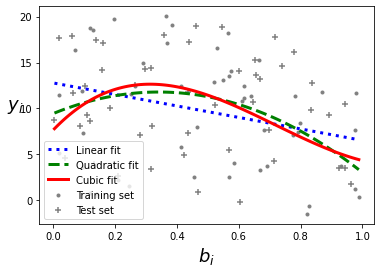

In [ ]:
## EXAMPLE CODE FOR LECTURE 3, LINEAR LEAST SQUARES FIT OF POLYNOMIAL
## Brien Alkire, 20220214

## IMPORT LIBRARIES ##
import numpy as np # For basic linear algebra
import cvxpy as cp # For linear least squares
from sklearn.model_selection import train_test_split # For splitting data into training and test sets
import matplotlib.pyplot as plt # For plotting data and curves
import pandas as pd # For plotting a table of results

## LOAD DATA, SPLIT IT INTO TRAINING AND TEST SETS AND PLOT ##
y=np.load('Data.npy') # Load full dataset y
b=np.load('Labels.npy') # Load measured labels b
y_train, y_test, b_train, b_test = train_test_split(y, b, test_size=0.5, random_state=0) # Split data
m=len(y_train)
plt.scatter(y_train,b_train,marker='.',color='gray') # Plot the training and test sets
plt.scatter(y_test,b_test,marker='+',color='gray')
plt.xlabel('$b_{i}$',fontsize=18)
plt.ylabel('$y_{i}$',fontsize=18,rotation=0)

## FORM MATRICES A FOR TRAINING AND TEST SETS, DEFINE MISC DATA ##
## Form the matrix A with enough columns to handle up to a cubic polynomial
A_train=np.array([np.ones(m), y_train, np.power(y_train,2), np.power(y_train,3)]).T.reshape(m,4) # For training
A_test=np.array([np.ones(m), y_test,np.power(y_test,2), np.power(y_test,3)]).T.reshape(m,4) # For testing the fit
yy=np.linspace(np.min(y),np.max(y),len(y)) # A grid of evenly spaced values of y for testing
n=np.array([2,3,4]) # The order of the polynomial will be n-1.  Define for linear, quadratic and cubic.
error_train=np.zeros(len(n)) # Use this array to store the error of the polynomial wrt the training set
error_test=np.zeros(len(n)) # Use this array to store the error of the polynomail wrt the test set

## LOOP THROUGH EACH POLYNOMIAL, SOLVE EACH POLYNOMIAL, EVALUATE ERROR TO TRAINING AND TEST SETS ##
styles={0:'dotted',1:'dashed',2:'solid'}
colors={0:'blue',1:'green',2:'red'}
for j in range(0,len(n)):
  x=cp.Variable(n[j]) # Define the variable, which will hold the polymial coefficients
  cost=cp.sum_squares(A_train[:,0:n[j]]@x-b_train) # Define the least squares problem
  prob=cp.Problem(cp.Minimize(cost))
  prob.solve() # Solve the least squares problem for x
  error_train[j]=np.power(cp.norm2(A_train[:,0:n[j]]@x-b_train).value,2) # Evaluate the error to training set
  error_test[j]=np.power(cp.norm2(A_test[:,0:n[j]]@x-b_test).value,2) # Evaluate the error to test set
  poly=np.zeros(len(y)) # Evaluate the fitted polynomail
  for i in range(0,n[j]):
    poly+=x.value[i]*np.power(yy,i)
  plt.plot(yy,poly,linestyle=styles[j],linewidth='3',color=colors[j]) # Plot the polynomial
plt.legend(['Linear fit','Quadratic fit','Cubic fit','Training set','Test set'],loc='lower left')
plt.show

# PLOT A TABLE SHOWING THE ERRORS TO TEST AND TRAINING SETS FOR EACH POLYNOMIAL
table=[error_train,error_test]
df=pd.DataFrame(data=table,columns=['Linear','Quadratic','Cubic'],index=['Training set error','Testing set error'])
print(df)